
# <center> Sistemas Expertos - Recomendación de Vinos</center> 

Para el desarrollo del presente trabajos porcederemos a realizar en analisis de un archivo csv, el mismo que contiene diferentes caracteristicas de los vinos. Para el analisis implementaremos la formula de propuesta por Wguillen donde considera los diferentes aspectos de los vinos para realizar una busqueda de los que mas se asemejan al vino que queremos comparar y nos arroja una recomendacion de la calidad y la similaridad.
Dentro del algoritmo K-nn el valor de similaridad va desde 0 hasta 1 donde uno es el valor con mayor similaridad.

## Formula

La formula implementada para el calculo de la similaridad de los vinos mas cercanos al introducido en la interfaz lo realizaremos de la sigueinte manera:
- Se va sumando los valores de las caracteristicas de cada vino el mismo que se almacena en una variable
- Se multiplica el peso que tiene cada caracteristica del vino, el peso esta considerado entre 0 - 10
- Se realiza una resta entre 1 menos, la diferencia entre el valor de la caracteristica del caso Base o vino que se encuentra en nuestra Base de casos o archivo csv menos la caracteristica de nuestro nuevo caso o vino a comparar, Esta diferencia se divide entre la diferencia de los valores maximos de cada caracteristica menos los valores minimos de las mismas.
- Finalmente se retorna la similaridad la cual es el valor de la sumatoria de las caracteristicas del vino dividido para la sumatoria de los pesos de nuestro nuevo caso o vino.
- Retornamos el valor de la formula o similaridad de los vinos.

Los casos que son similares los almacenamos en un Diccionario que nos permitara ordenarlos en funcion del calculo de la similaridad de cada uno, lo cual nos permitira recomendar el vino mas parecido al que se ingresa.

Agregamos la calidad del vino recomendado ya que el mismo sera el mas cercano o el que mejor se asemeje al vino de nuestra Base de casos.

Nustra al devolver los vinos mas cercanos al ingresado por la interfaz retornamos la similaridad y la calidad del mas cercano y procedemos a presetar aquellos vinos que mas se asemejan en funcion de la similaridad.

La interfaz se procedio a desarrallor con la libreria tkinter, la cual nos permite crear los componetes. Dentro de la ventana Procedemos a crear los Spinbox los que nos permitira establecer los valores del vino.

- "Fixed Acidity"       Valor minimo = 4.6         Valor maximo = 15.9
- "Volatile Acidity"    Valor minimo = 0.12        Valor maximo = 1.58
- "Citric Acid"         Valor minimo = 0           Valor maximo = 1.0,
- "Residual Sugar"      Valor minimo = 0.9         Valor maximo = 13.9
- "Chlorides"           Valor minimo = 0.012       Valor maximo = 0.611, 
- "Free Sulfure Dioxide"    Valor minimo = 1       Valor maximo = 72.0
- "Totxt11l Sulfure Dioxide"     Valor minimo = 6    Valor maximo = 289.0
- "Density"             Valor minimo = 0.99,  1.0,
- "pH"                  Valor minimo = 2.74        Valor maximo = 4.01
- "Sulphates"           Valor minimo = 0.33        Valor maximo = 2.0
- "Alcohol"              Valor minimo = 8.4        Valor maximo = 14.9

Creamos los metodos que nos permitira cargar el archivo csv que contiene los vinos o casos Base en un Diccionario, el cual nos permitira accedera a cada uno y sis caracteristicas para realizar el calculo de la formula de los mismos. Dentro de la interfaz cada vez que se realize una comparacion y se recomiende un vino el caso nuevo que se ingreso se ira almacenado en nuestra base de casos ya que nos permitira recomendar la siguiete veZ un vino con mas aproximacion posible.



In [13]:
from tkinter import *
from tkinter import ttk
from tkinter import messagebox
import pandas as pd
import operator
import csv
import os

ven = Tk()
def analizar():
    ventanaVinosRecomendados = Tk()
    ventanaVinosRecomendados.title("VinosRecomendacion")
    archivoA = pd.read_csv('winequality-red.csv')
    listaVinos = [list(row) for row in archivoA.values]
    listaVinosIguales = {}

    nuevoCaso = [float(txt1.get()), float(txt2.get()), float(txt3.get()), float(txt4.get()), float(txt5.get()),
                 float(txt6.get()),
                 float(txt7.get()), float(txt8.get()), float(txt9.get()), float(txt10.get()), float(txt11.get())]
    valoresMinimos = [4.6, 0.12, 0, 0.9, 0.012, 1, 6, 0.99, 2.74, 0.33, 8.4]
    valoresMaximos = [15.9, 1.58, 1.0, 13.9, 0.611, 72.0, 289.0, 1.0, 4.01, 2.0, 14.9]
    pesoV = [float(txt110.get()), float(txt22.get()), float(txt33.get()), float(txt44.get()), float(txt55.get()),
             float(txt66.get()), float(txt77.get()), float(txt88.get()), float(txt99.get()), float(txt100.get()), float(txt111.get())]

    def comparar(casoBase):
        valor = 0
        for i in range(len(valoresMinimos)):
            valor += pesoV[i] * (1 - ((abs(casoBase[i] - nuevoCaso[i])) / (valoresMaximos[i] - valoresMinimos[i])))
        return valor / sum(pesoV)

    for i in range(len(listaVinos)):
        fila = []
        fila = listaVinos[i]
        x = comparar(fila)
        listaVinosIguales.update({str(i): round(x, 3)})

    listaVinosOrdenados = dict(sorted(listaVinosIguales.items(), key=operator.itemgetter(1)))
    cols = (
        "#Wine", "Fixed Acidity", "Volatile Acidity", "Citric Acid", "Residual Sugar", "Chlorides",
        "Free Sulfure Dioxide",
        "Totxt11l Sulfure Dioxide", "Density", "pH", "Sulphates", "Alcohol", "Quality", "comparar")
    tree = ttk.Treeview(ventanaVinosRecomendados, columns=cols, show='headings')
    vsb = ttk.Scrollbar(ventanaVinosRecomendados, orient="vertical", command=tree.yview)
    vsb.pack(side=RIGHT, fill=BOTH)

    tree.configure(yscrollcommand=vsb.set)
    for i in range(len(cols)):
        tree.heading(cols[i], text=cols[i])
        tree.column(cols[i], minwidth=0, width=50)
    tree.pack(expand=YES, fill=BOTH)
    txt11m = len(listaVinosOrdenados)
    for i in range(txt11m):
        pos = int(list(listaVinosOrdenados.items())[i][0])
        c1 = listaVinos[int(pos)][0]
        c2 = listaVinos[int(pos)][1]
        c3 = listaVinos[int(pos)][2]
        c4 = listaVinos[int(pos)][3]
        c5 = listaVinos[int(pos)][4]
        c6 = listaVinos[int(pos)][5]
        c7 = listaVinos[int(pos)][6]
        c8 = listaVinos[int(pos)][7]
        c9 = listaVinos[int(pos)][8]
        c10 = listaVinos[int(pos)][9]
        c11 = listaVinos[int(pos)][10]
        c12 = listaVinos[int(pos)][11]
        sim = str(list(listaVinosOrdenados.items())[i][1])
        tree.insert("", 0, i, values=(str(pos), c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, sim))
    fpos = list(listaVinosOrdenados.items())[txt11m - 1][0]
    fval = list(listaVinosOrdenados.items())[txt11m - 1][1]
    res = listaVinos[int(fpos)][11]

    li = [nuevoCaso[0], nuevoCaso[1], nuevoCaso[2], nuevoCaso[3], nuevoCaso[4], nuevoCaso[5], nuevoCaso[6],
          nuevoCaso[7], nuevoCaso[8], nuevoCaso[9], nuevoCaso[10], res]
    if li in listaVinos:
        label2.configure(text="Calificacion: " + res)
        label3.configure(text="Similitud: " + str(fval))
    else:
        with open('winequality-red.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow((li))
        label2.configure(text="Calificacion: " + res)
        label3.configure(text="Similitud: " + str(fval))

ven.geometry('1100x400')
#1
Label(ven, text="Fixed Acidy").place(x=0, y=30)
txt1 = Spinbox(ven, from_=4.6, to=15.9, increment=0.1, width=10)
txt1.place(x=100, y=30)
var = IntVar()
var.set(3)
txt110 = Spinbox(ven, from_=1, to=10, textvariable=var, width=3)
txt110.place(x=230, y=30)

Label(ven, text="volatile acidity").place(x=350, y=30)
txt2 = Spinbox(ven, from_=0.12, to=1.58, increment=0.01, width=10)
txt2.place(x=460, y=30)
var = IntVar()
var.set(3)
txt22 = Spinbox(ven, from_=1, to=10, textvariable=var, width=3)
txt22.place(x=600, y=30)

Label(ven, text="pH").place(x=700, y=30)
txt9 = Spinbox(ven, from_=2.74, to=4.01, increment=0.01, width=10)
txt9.place(x=750, y=30)
var = IntVar()
var.set(6)
txt99 = Spinbox(ven, from_=1, to=10, textvariable=var, width=3)
txt99.place(x=850, y=30)
#2
Label(ven, text="residual sugar").place(x=0, y=90)
txt4 = Spinbox(ven, from_=0.9, to=13.9, increment=0.1, width=10)
txt4.place(x=100, y=90)
var = IntVar()
var.set(5)
txt44 = Spinbox(ven, from_=1, to=10, textvariable=var, width=3)
txt44.place(x=230, y=90)

Label(ven, text="chlorides").place(x=350, y=90)
txt5 = Spinbox(ven, from_=0.012, to=0.611, increment=0.001, width=10)
txt5.place(x=460, y=90)
txt55 = Spinbox(ven, from_=1, to=10, width=3)
txt55.place(x=600, y=90)
#3
Label(ven, text="total sulfur dioxide").place(x=0, y=150)
txt7 = Spinbox(ven, from_=6.0, to=289.0, increment=1.0, width=10)
txt7.place(x=100, y=150)
txt77 = Spinbox(ven, from_=1, to=10, width=3)
txt77.place(x=230, y=150)

Label(ven, text="density").place(x=350, y=150)
txt8 = Spinbox(ven, from_=0.99, to=1.0, increment=0.001, width=10)
txt8.place(x=460, y=150)
txt88 = Spinbox(ven, from_=1, to=10, width=3)
txt88.place(x=600, y=150)
#4
Label(ven, text="sulphates").place(x=0, y=210)
txt10 = Spinbox(ven, from_=0.33, to=2.0, increment=0.01, width=10)
txt10.place(x=100, y=210)
txt100 = Spinbox(ven, from_=1, to=10, width=3)
txt100.place(x=230, y=210)

Label(ven, text="alcohol").place(x=350, y=210)
txt11 = Spinbox(ven, from_=8.4, to=14.9, increment=0.1, width=10)
txt11.place(x=460, y=210)
var = IntVar()
var.set(5)
txt111 = Spinbox(ven, from_=1, to=10, textvariable=var, width=3)
txt111.place(x=600, y=210)
#5
Label(ven, text="citric acid").place(x=0, y=260)
txt3 = Spinbox(ven, from_=0.0, to=1.0, increment=0.1, width=10)
txt3.place(x=100, y=260)
var = IntVar()
var.set(3)
txt33 = Spinbox(ven, from_=1, to=10, textvariable=var, width=3)
txt33.place(x=230, y=260)

Label(ven, text="free sulfur dioxide").place(x=350, y=260)
txt6 = Spinbox(ven, from_=1.0, to=72.0, increment=0.5, width=10)
txt6.place(x=460, y=260)
txt66 = Spinbox(ven, from_=1, to=10, width=3)
txt66.place(x=600, y=260)
#botonYResp
ttk.Button(ven, text='PROCESAR', command=analizar).place(x=750, y=90)
label2 = ttk.Label(ven, text="Calificacion: ", width=50)
label2.place(x=750, y=125)
label3 = ttk.Label(ven, text="Similitud: ", width=50)
label3.place(x=750, y=175)

ven.mainloop()

# Resultado
El sistema permite calcular la similitud que existen en la base de casos o csv. 
Gracias a la formula se obtiene una similaridaad entre 0 y 1, donde se puede asignar el peso de mayor importacia a cada caracteristica del nuevo caso.
El peso sera evaluado entre 1 y 10. 
si no se da que el vino posea esa caracteristica la desviacion de la formula se reducira ya que un peso de 0 no tiene importancia en la formula.


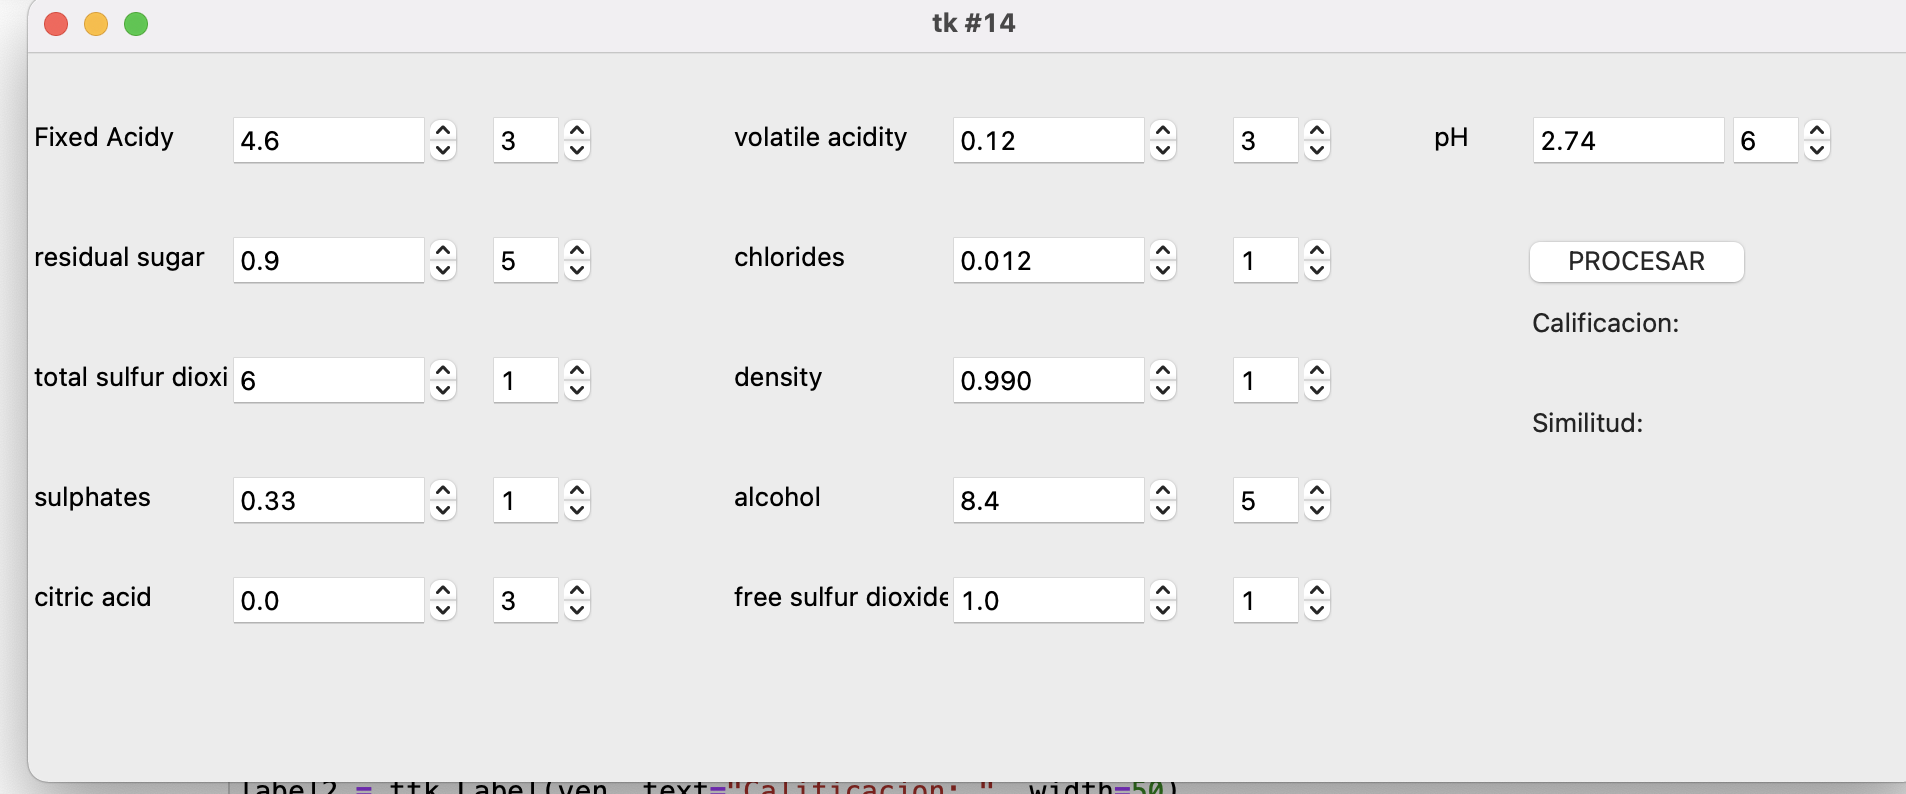





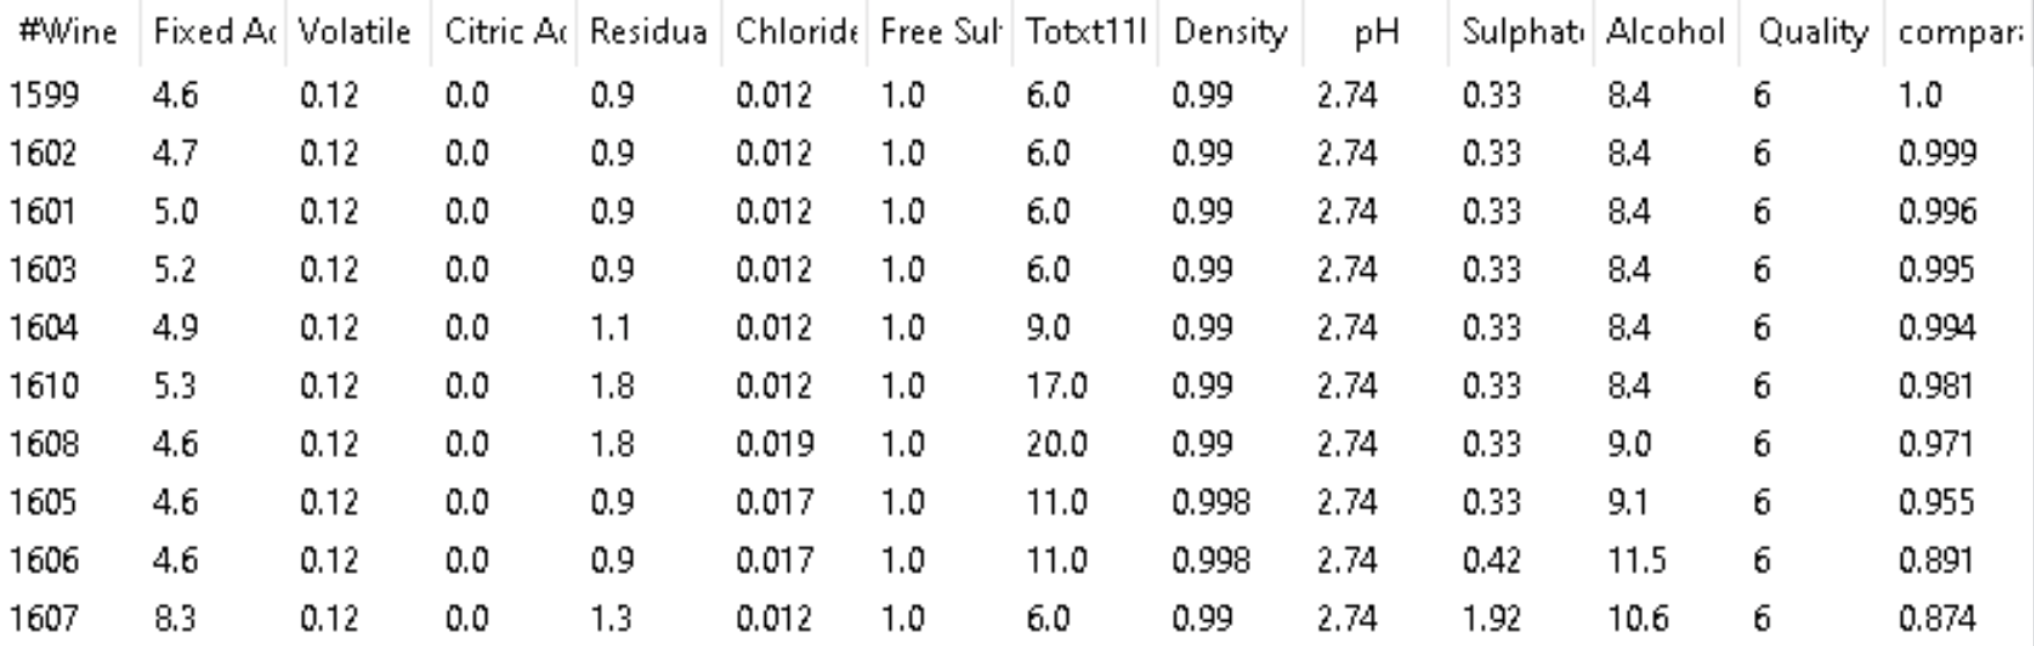
